<a href="https://colab.research.google.com/github/Ashwitha-bhukya/practice_projects/blob/main/amazon_bestseller_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this article, I’m going to introduce you to a data science project on Amazon bestselling books analysis with the Python programming language. The data I’ll be using in this data science project is a dataset of Amazon’s 50 Best Books between 2009 and 2019.

The dataset contains 550 books and has been categorized into fiction and non-fiction using Goodreads.

**Data Science Project on Amazon Bestselling Books Analysis with Python**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

import string
import re


Seaborn verion 0.12.2


In [2]:
df = pd.read_csv("/content/bestsellers with categories amazon.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


**Visible issues**

**Duplicates**

It's very common for bestselling books to get reissued/republished. It is necessary to filter out this kind of noise by either eliminating or merging.

In [5]:
dup = pd.concat(g for _, g in df.groupby("Name") if len(g) > 1)
print(dup.head(5))
print(dup.shape)

                           Name           Author  User Rating  Reviews  Price  \
9     A Man Called Ove: A Novel  Fredrik Backman          4.6    23848      8   
10    A Man Called Ove: A Novel  Fredrik Backman          4.6    23848      8   
20  All the Light We Cannot See    Anthony Doerr          4.6    36348     14   
21  All the Light We Cannot See    Anthony Doerr          4.6    36348     14   
32                     Becoming   Michelle Obama          4.8    61133     11   

    Year        Genre  
9   2016      Fiction  
10  2017      Fiction  
20  2014      Fiction  
21  2015      Fiction  
32  2018  Non Fiction  
(295, 7)


We see above that there are 295 rows containing books with same names and different publishing year. The rating and reviews are identical so we can simply pick the newest version/latest year. The years are already sorted, so we can just pick the last entry of each duplicate.

Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [7]:
df_filtered=df.drop_duplicates(subset='Name',keep = 'last',inplace = False)
df_filtered.shape

(351, 7)

now we confirm that no more duplicates are found

In [8]:
df_filtered.duplicated('Name').sum()

0

***Freebies***

We can see in the dataframe description that some items are priced at 0. These can pose a misrepresentation later when we analyze the price and value performance.

In [9]:
df_filtered.loc[df_filtered['Price'] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction


# **Exploratory Data Analysis**




**The Authors**

Let's explore the data by examining the authors. How many authors got into the list? How many books did they write? How many reviews did they get?

In [10]:
df_filtered.nunique()

Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64

So, there are 248 authors in this list, and they dished out 351 best selling books between 2009 and 2019. Not bad at all!

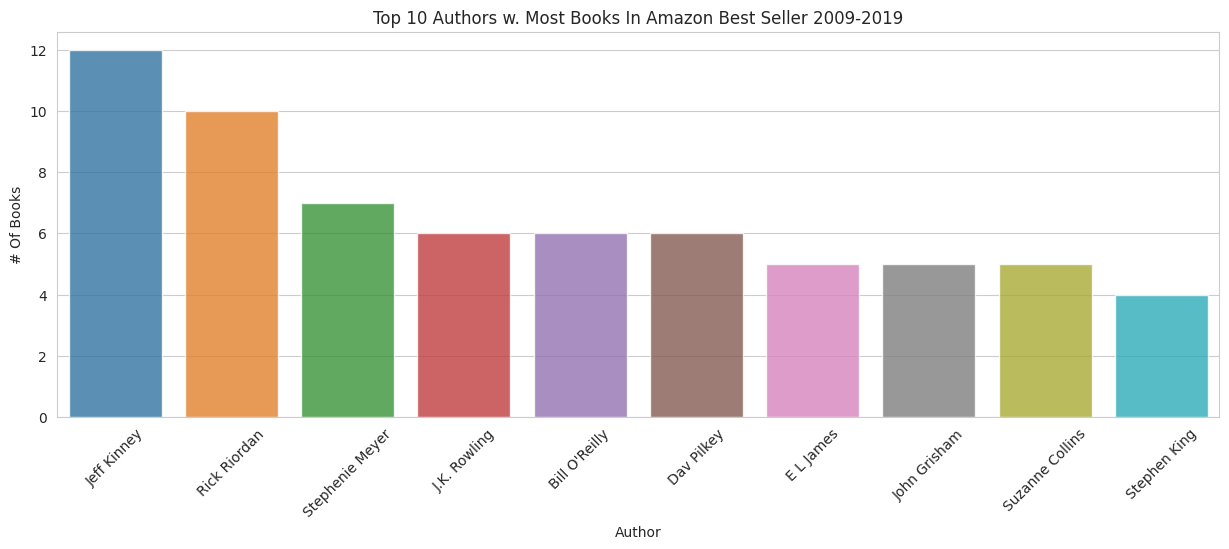

In [12]:
top10 = df_filtered.value_counts('Author')
top10 = top10[:10,]
plt.figure(figsize=(15,5))
sns.barplot(x=top10.index, y=top10.values, alpha=0.8)
plt.xticks(rotation=45)
plt.title('Top 10 Authors w. Most Books In Amazon Best Seller 2009-2019')
plt.ylabel('# Of Books')
plt.show()

We see the top 10 authors with the most books published within the timespan, with Jeff Kinney leading the ranks, followed by Rick Riordan. We'll see if quantity does matter. For this step, we will consider 4 variables as threshold:

1.a = # reviews received by the author

2.b = # least number of reviews received

3.S = mean rating received by the author

4.C = mean rating of the dataset

Then we calculate the weighted rating using Bayesian Average:

**W_Rating = (S a / a + b ) + ( C b / a + b)**

In [13]:
b = df_filtered['Reviews'].min() # finding minumum value in 'Reviews'
C = df_filtered['User Rating'].mean() # finding mean value of 'user rating'

In [16]:

C

4.609116809116809

In [17]:
b

37

In [18]:
all_author=df_filtered.value_counts('Author')
author_index=all_author.index
all_qty=all_author.values

In [19]:
all_author

Author
Jeff Kinney        12
Rick Riordan       10
Stephenie Meyer     7
J.K. Rowling        6
Bill O'Reilly       6
                   ..
Fredrik Backman     1
Gallup              1
Garth Stein         1
Gayle Forman        1
Jim Collins         1
Length: 248, dtype: int64

In [20]:
author_index

Index(['Jeff Kinney', 'Rick Riordan', 'Stephenie Meyer', 'J.K. Rowling',
       'Bill O'Reilly', 'Dav Pilkey', 'E L James', 'John Grisham',
       'Suzanne Collins', 'Stephen King',
       ...
       'Eric Larson', 'Ernest Cline', 'F. A. Hayek', 'F. Scott Fitzgerald',
       'Francis Chan', 'Fredrik Backman', 'Gallup', 'Garth Stein',
       'Gayle Forman', 'Jim Collins'],
      dtype='object', name='Author', length=248)

In [21]:
all_qty

array([12, 10,  7,  6,  6,  6,  5,  5,  5,  4,  4,  4,  3,  3,  3,  3,  3,
        3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [22]:
# caluclating Bayesian average
sum_rating=np.zeros(len(all_author))
a=np.zeros(len(all_author))
S=np.zeros(len(all_author))
w_rating=np.zeros(len(all_author))

for i in range(0,len(all_author)):
    sum_rating[i]=df_filtered.loc[df_filtered['Author'] == author_index[i], 'User Rating'].sum()
    S[i]=sum_rating[i]/all_qty[i]
    a[i]=df_filtered.loc[df_filtered['Author'] == author_index[i], 'Reviews'].sum()

    w_rating[i]=(S[i] * a[i]/(a[i]+b))+(C * b/(a[i]+b))

In [23]:
w_rating[i]

4.501155501413085

In [24]:
author_rating=pd.DataFrame({'Author': author_index[:,],'Books Written': all_qty[:,],'Reviews': a[:,],'Average Rating': S[:,], 'Weighted Rating': w_rating[:,]})
author_rating['Average Rating']=author_rating['Average Rating'].round(decimals=2)
author_rating

,Author,Books Written,Reviews,Average Rating,Weighted Rating
0,Jeff Kinney,12,67482.0,4.80,4.799895
1,Rick Riordan,10,39541.0,4.77,4.769850
2,Stephenie Meyer,7,44058.0,4.66,4.657103
3,J.K. Rowling,6,70535.0,4.45,4.450083
4,Bill O'Reilly,6,54445.0,4.63,4.633317
...,...,...,...,...,...
243,Fredrik Backman,1,23848.0,4.60,4.600014
244,Gallup,1,5069.0,4.00,4.004414
245,Garth Stein,1,11813.0,4.70,4.699716
246,Gayle Forman,1,7153.0,4.30,4.301591


Now we can rank the authors based on the weighted ratings

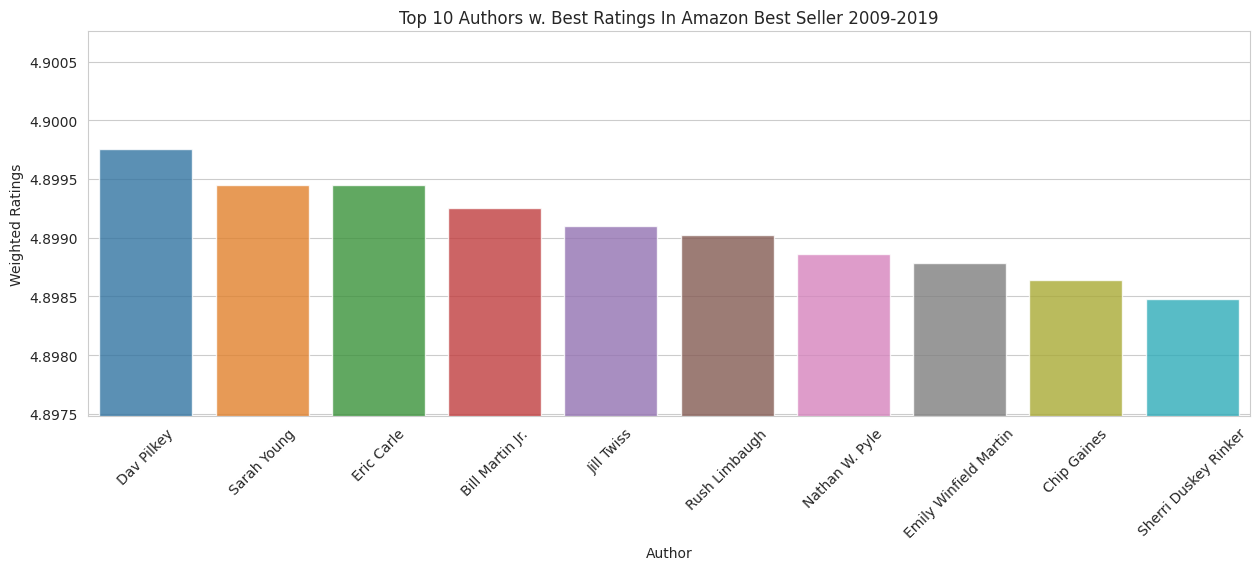

In [26]:
top10_rating=author_rating.nlargest(10,['Weighted Rating'])
plt.figure(figsize=(15,5))
sns.barplot(x=top10_rating['Author'], y=top10_rating['Weighted Rating'], alpha=0.8)
plt.title('Top 10 Authors w. Best Ratings In Amazon Best Seller 2009-2019')
plt.xticks(rotation=45)
plt.ylim(top10_rating['Weighted Rating'].min()-0.001,top10_rating['Weighted Rating'].max()+0.001)
plt.ylabel('Weighted Ratings')
plt.show()

As seen above, the ranking based on rating looks nothing like the one based on the amount of books published. Dav Pilkey tops the chart with a score of 4.899757.

Now let's look at the distribution of the authors by scattering them in quadrants.

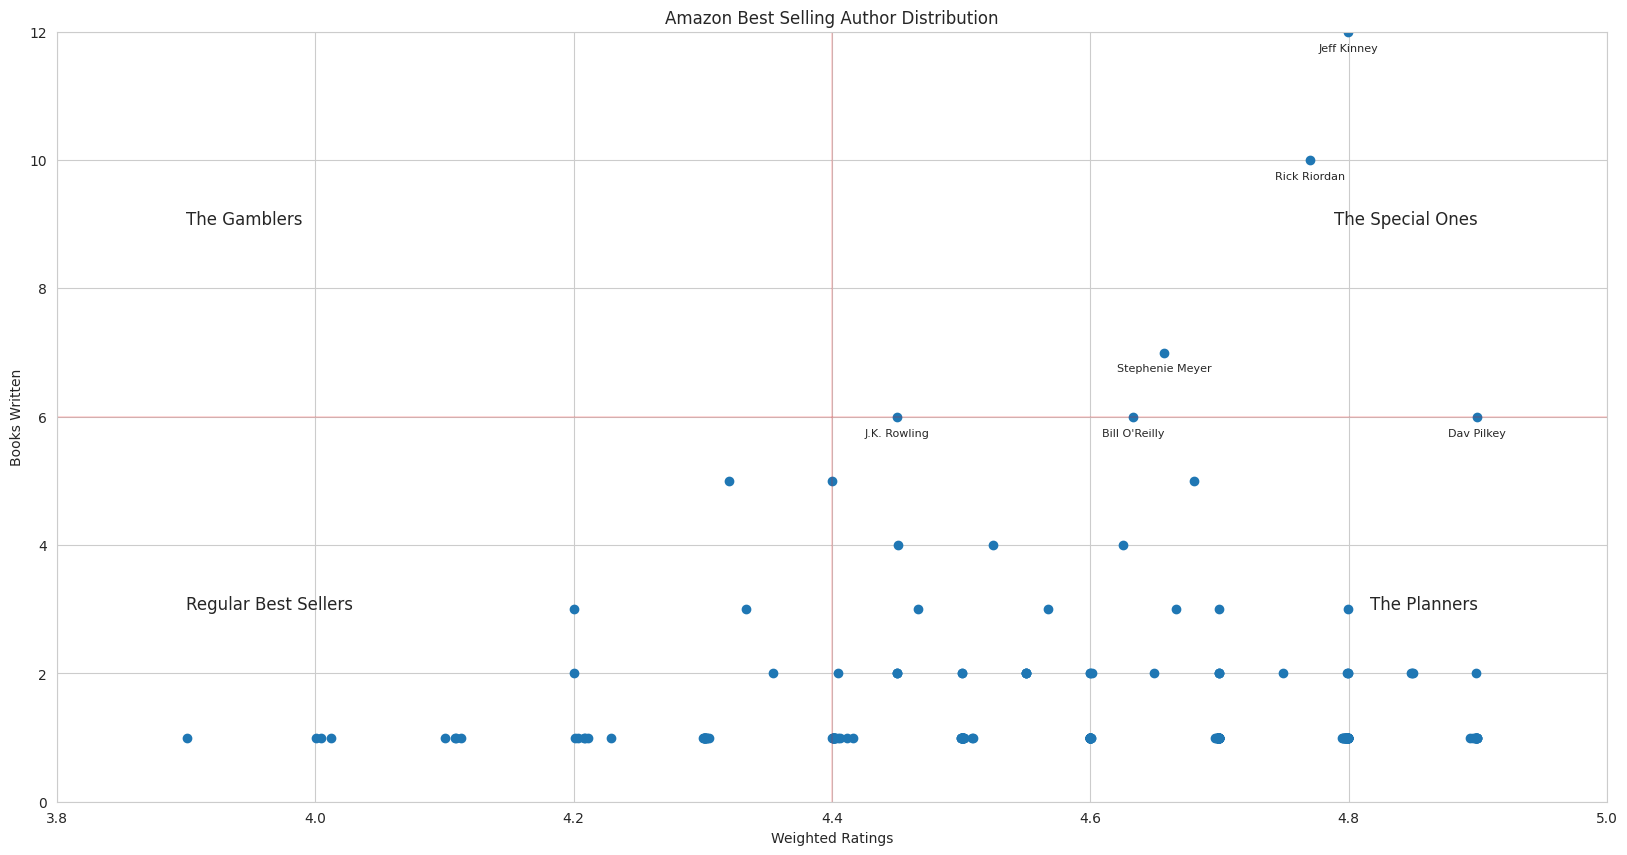

In [27]:
top=author_rating.loc[(author_rating['Books Written'] >= 6) & (author_rating['Weighted Rating'] >= 4.4), 'Author']

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
plt.scatter(author_rating['Weighted Rating'],author_rating['Books Written'])
plt.plot([4.4,4.4],[0,12], linewidth=0.2, color='red')
plt.plot([3.8,5.0],[6,6], linewidth=0.2, color='red')
plt.xlim(3.8,5.0)
plt.ylim(0,12)

for i in range(0,len(top)):
    getx=author_rating.loc[author_rating['Author'] == top[i], 'Weighted Rating']
    gety=author_rating.loc[author_rating['Author'] == top[i], 'Books Written']
    plt.text(getx, gety-0.3,top[i],fontsize=8,ha='center')

plt.text(3.9, 3,'Regular Best Sellers',fontsize=12,ha='left')
plt.text(3.9, 9,'The Gamblers',fontsize=12,ha='left')
plt.text(4.9, 3,'The Planners',fontsize=12,ha='right')
plt.text(4.9, 9,'The Special Ones',fontsize=12,ha='right')

ax.set(title='Amazon Best Selling Author Distribution',xlabel='Weighted Ratings',ylabel='Books Written')
plt.show()

We see that the majority of authors are placed in the bottom right quadrant. These group represents authors that take their time to perfect their books, which got them high ratings with lower amount books published.

On the other hand, we see also some special ones, who dished out plenty of books and consistently getting top ratings.

**The Genre**

since we have only only 2 fiction & non fiction let's try to compare this two

In [31]:
genre_reviews = df_filtered.groupby("Genre")["Reviews"].sum()
genre_ratings = df_filtered.groupby("Genre")["User Rating"].sum()
genre_reviews_avg = df_filtered.groupby("Genre")["Reviews"].mean()
genre_ratings_avg = df_filtered.groupby("Genre")["User Rating"].mean()

In [32]:
genre_table=pd.DataFrame({'Genre': ['Fiction', 'Non Fiction'],
                          'Total Reviews': genre_reviews.values[:,],
                          'Total Ratings': genre_ratings.values[:,],
                          'Average Reviews': genre_reviews_avg.values[:,],
                          'Average Ratings': genre_ratings_avg.values[:,]})
genre_table

,Genre,Total Reviews,Total Ratings,Average Reviews,Average Ratings
0,Fiction,2097771,738.5,13111.068750,4.615625
1,Non Fiction,1337318,879.3,7001.664921,4.603665


In [33]:
a = genre_reviews
b = df_filtered['Reviews'].min()
C = df_filtered['User Rating'].mean()
S = genre_ratings_avg
w_rating=np.zeros(2)

for i in range(0,len(genre_reviews.index)):
    w_rating[i]=(S[i] * a[i]/(a[i]+b))+(C * b/(a[i]+b))

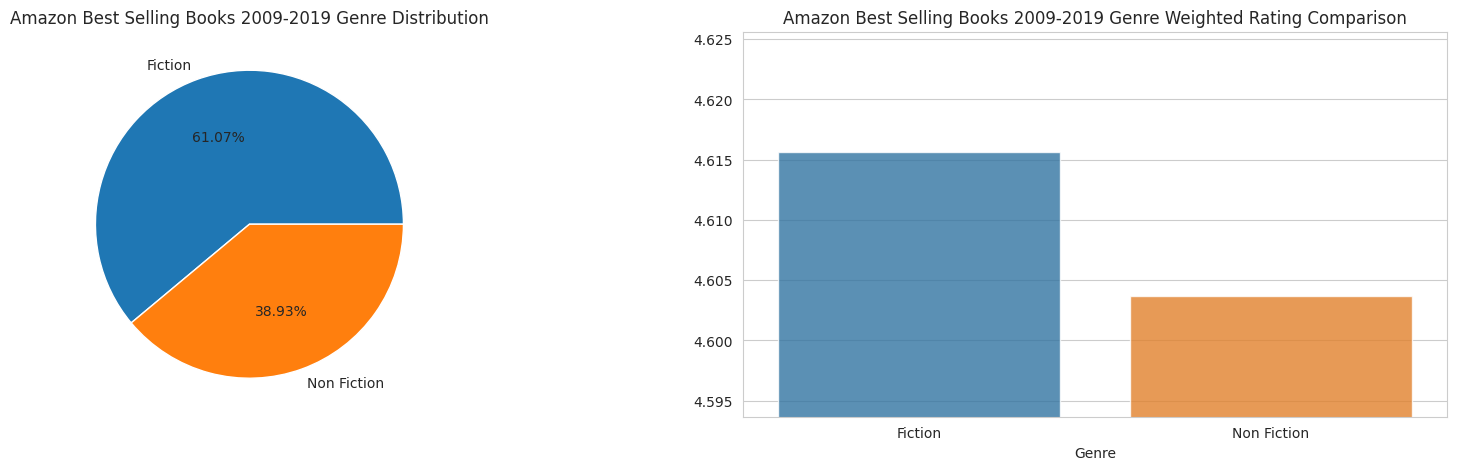

In [35]:
fig=plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
plt.pie(genre_reviews,labels=genre_reviews.index, autopct='%1.2f%%')
plt.title('Amazon Best Selling Books 2009-2019 Genre Distribution')
fig.add_subplot(1,2,2)
sns.barplot(x=genre_reviews.index,y=w_rating,alpha=0.8)
plt.ylim(w_rating.min()-0.01,w_rating.max()+0.01)
plt.title('Amazon Best Selling Books 2009-2019 Genre Weighted Rating Comparison')
plt.show()

We can see in the figures above that Fiction genre trumps Non Fiction both in popularity and ratings. Although the difference in reviews received are large, the gap between the weighted ratings are very close (below 0.1).

**The Price and Value of Books**

Now let's analyze the books themselves. Using the same approach, we measure their weighted ratings, and we consider the price also. However, we will consider books priced in 0 USD in the dataset as abnormal data points.

In [36]:
df_filtered2=df_filtered
print('Before: ',df_filtered.shape)
df_filtered2.drop(df_filtered2.loc[df_filtered2['Price'] == 0].index, inplace = True)
df_filtered2.reset_index(drop=True, inplace=True)
print('After: ',df_filtered2.shape)

Before:  (351, 7)
After:  (343, 7)


<ipython-input-36-6730fbb48001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2.drop(df_filtered2.loc[df_filtered2['Price'] == 0].index, inplace = True)


In [37]:
book_reviews = df_filtered2["Reviews"]
book_ratings = df_filtered2["User Rating"]
book_reviews_avg = df_filtered2["Reviews"].mean()

b = df_filtered2['Reviews'].min()
C = df_filtered2['User Rating'].mean()
a = book_reviews
S = book_ratings

w_rating=np.zeros(len(df_filtered2['Name']))

for i in range(0,len(df_filtered2['Name'])):
    w_rating[i]=(S[i] * a[i]/(a[i]+b))+(C * b/(a[i]+b))

df_filtered2['Weighted Rating']=w_rating
df_filtered2

<ipython-input-37-877d91abb6ce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['Weighted Rating']=w_rating


,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699800
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600103
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699817
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699838
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799067
...,...,...,...,...,...,...,...,...
338,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,4.500363
339,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,4.211214
340,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,4.799668
341,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,4.898848


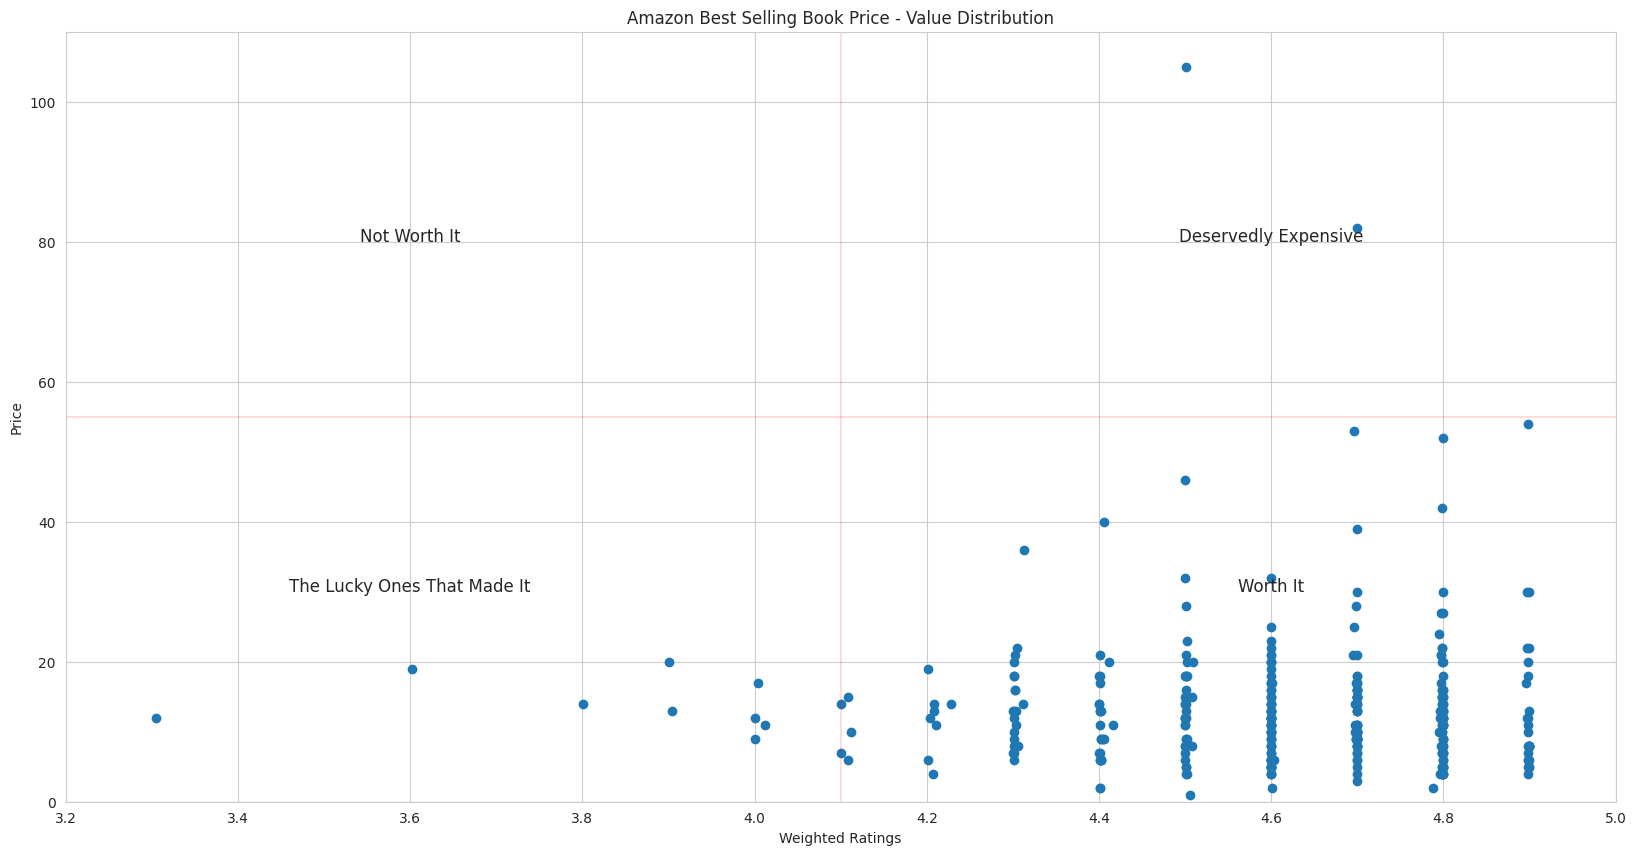

In [38]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
plt.scatter(df_filtered2['Weighted Rating'],df_filtered2['Price'])
plt.plot([4.1,4.1],[0,110], linewidth=0.2, color='red')
plt.plot([3.2,5.0],[55,55], linewidth=0.2, color='red')
plt.xlim(3.2,5.0)
plt.ylim(0,110)


plt.text(3.6, 30,'The Lucky Ones That Made It',fontsize=12,ha='center')
plt.text(3.6, 80,'Not Worth It',fontsize=12,ha='center')
plt.text(4.6, 30,'Worth It',fontsize=12,ha='center')
plt.text(4.6, 80,'Deservedly Expensive',fontsize=12,ha='center')

ax.set(title='Amazon Best Selling Book Price - Value Distribution',xlabel='Weighted Ratings',ylabel='Price')
plt.show()

**Cream of The Crop**

Looking at the figure above, the majority of best sellers are priced well. Now we'll dive deeper and find the cream of the crop: books under 30 USD with ratings above 4.85

In [39]:
topbooks=df_filtered2.loc[(df_filtered2['Price'] <= 30) & (author_rating['Weighted Rating'] > 4.85), :]
topbooks.sort_values(['Weighted Rating','Price'],ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
173,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction,4.899502
115,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction,4.898921
212,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2019,Non Fiction,4.799719
237,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2019,Non Fiction,4.699851
29,"Barefoot Contessa, How Easy Is That?: Fabulous...",Ina Garten,4.7,615,21,2010,Non Fiction,4.694656
236,The Five Love Languages: How to Express Heartf...,Gary Chapman,4.6,803,9,2009,Non Fiction,4.600257
58,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction,4.600027
179,Orphan Train,Christina Baker Kline,4.6,21930,11,2014,Fiction,4.600010
146,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction,4.501055
75,Eat to Live: The Amazing Nutrient-Rich Program...,Joel Fuhrman MD,4.5,6346,9,2012,Non Fiction,4.500613


As seen above, we have successfully found the best books in terms of price-value performance.